# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     703.7
Date:                Fri, 23 Aug 2024   Prob (F-statistic):           1.99e-38
Time:                        17:38:05   Log-Likelihood:                -4.6769
No. Observations:                  50   AIC:                             17.35
Df Residuals:                      46   BIC:                             25.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0849      0.094     53.856      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.60557911  5.09619436  5.54467053  5.92113016  6.20647841  6.39554028
  6.49791088  6.53637892  6.54318265  6.55471318  6.60553551  6.72270963
  6.92134463  7.20211628  7.55115609  7.94232975  8.34153103  8.71228527
  9.02174209  9.2460726   9.37438444  9.41051134  9.37238326  9.28908057
  9.19605617  9.12931075  9.11947792  9.18679123  9.33775984  9.56409909
  9.84409164 10.14615556 10.43403318 10.67274809 10.83435169 10.90251506
 10.87521173 10.76505066 10.59720461 10.40527432 10.225768   10.09210315
 10.02911616 10.04898174 10.14921268 10.31306844 10.51230565 10.71181834
 10.87540581 10.97172027]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.96784245 10.82058131 10.55143594 10.20940003  9.85896651  9.56433742
  9.37370506  9.30745276  9.35316439  9.46866423]


## Plot comparison

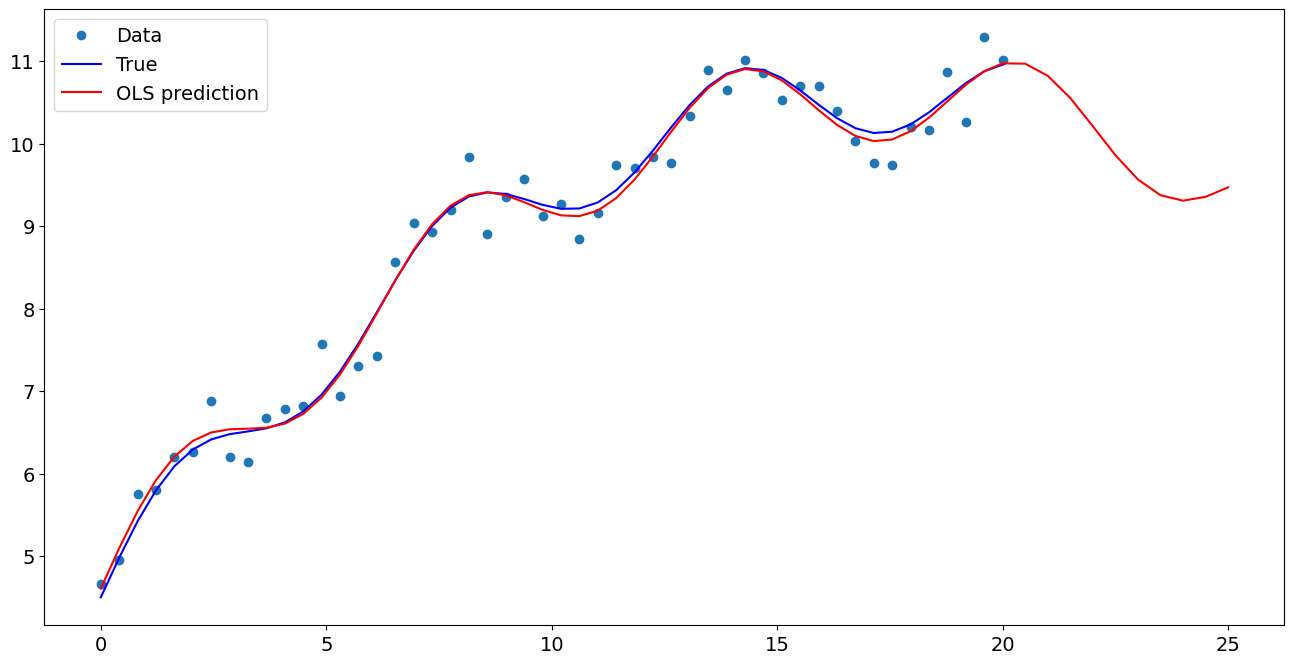

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.084862
x1                  0.484996
np.sin(x1)          0.548219
I((x1 - 5) ** 2)   -0.019171
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.967842
1    10.820581
2    10.551436
3    10.209400
4     9.858967
5     9.564337
6     9.373705
7     9.307453
8     9.353164
9     9.468664
dtype: float64